In [1]:
from sklearn.linear_model import Perceptron
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/javie/Universidad/Trimestre 3/Machine Learning 2/Laboratorio 1/titanic/train.csv")
data.head(n=10)[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Survived']]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived
0,3,male,22.0,1,0,7.2500,NaN,0
1,1,female,38.0,1,0,71.2833,C85,1
2,3,female,26.0,0,0,7.9250,NaN,1
3,1,female,35.0,1,0,53.1000,C123,1
4,3,male,35.0,0,0,8.0500,NaN,0
5,3,male,NaN,0,0,8.4583,NaN,0
6,1,male,54.0,0,0,51.8625,E46,0
7,3,male,2.0,3,1,21.0750,NaN,0
8,3,female,27.0,0,2,11.1333,NaN,1
9,2,female,14.0,1,0,30.0708,NaN,1


In [3]:
# Se rellena los campos de edad vacíos con el promedio de edad.
data['Age'] = data['Age'].fillna(data['Age'].dropna().mean())
# Se cambio NaN de la columna cabina por "Unknown" para evitar eliminar una gran cantidad de datos durante la limpieza.
data['Cabin'] = data['Cabin'].fillna('Unknown')
# Drop a valores Na
data = data.dropna()

In [4]:
gender = set(data['Sex'].values)
gender = dict(zip(gender, range(len(gender))))
data['Sex'] = data['Sex'].map(lambda value: gender[value])

In [5]:
has_cabin = set(data['Cabin'].values)
has_cabin = dict(zip(has_cabin, range(len(has_cabin))))
data['Cabin'] = data['Cabin'].map(lambda cabin: has_cabin[cabin] != 83)
data['Cabin'] = data['Cabin'].map(lambda hasCabin: 0 if not hasCabin else 1)

In [6]:
data.head(n=10)[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Survived']]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived
0,3,1,22.000000,1,0,7.2500,1,0
1,1,0,38.000000,1,0,71.2833,1,1
2,3,0,26.000000,0,0,7.9250,1,1
3,1,0,35.000000,1,0,53.1000,1,1
4,3,1,35.000000,0,0,8.0500,1,0
5,3,1,29.699118,0,0,8.4583,1,0
6,1,1,54.000000,0,0,51.8625,1,0
7,3,1,2.000000,3,1,21.0750,1,0
8,3,0,27.000000,0,2,11.1333,1,1
9,2,0,14.000000,1,0,30.0708,1,1


In [7]:
# Seleccionamos todos los parámetros relevantes.
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']]
y = data['Survived']
X.shape, y.shape

((889, 7), (889,))

In [8]:
titanic_data = X.values
titanic_data_label = y.values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [10]:
def evaluate(model, X, y, test_size=0.2, fitted=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=0, shuffle=True)
    if not fitted:
        clf = model.fit(X_train, y_train)
    else :
        clf = model
    
    try:
        pred_train = clf.decision_function(X_train)
        pred_test = clf.decision_function(X_test)
    
        plt.figure(figsize=(16, 6))
        plt.subplot(121)
        fpr, tpr, _ = roc_curve(y_train, pred_train)
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_train, pred_train))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Training set")

        plt.subplot(122)
        fpr, tpr, _ = roc_curve(y_test, pred_test)
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_test, pred_test))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Test set")
    except AttributeError:
        try:
            pred_train = clf.predict_proba(X_train)
            pred_test = clf.predict_proba(X_test)
        except AttributeError:
            pred_train = clf.predict(X_train)
            pred_test = clf.predict(X_test)
    
        plt.figure(figsize=(16, 6))
        plt.subplot(121)
        fpr, tpr, _ = roc_curve(y_train, pred_train[:, 1])
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_train, pred_train[:, 1]))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Training set")

        plt.subplot(122)
        fpr, tpr, _ = roc_curve(y_test, pred_test[:, 1])
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_test, pred_test[:, 1]))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Test set")

    plt.show()

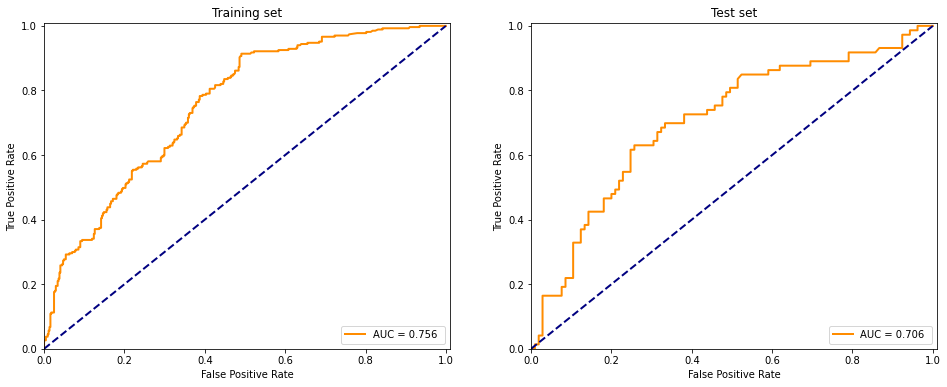

In [11]:
evaluate(Perceptron(), X, y)

In [12]:
from sklearn.neural_network import MLPClassifier

C:\Users\javie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


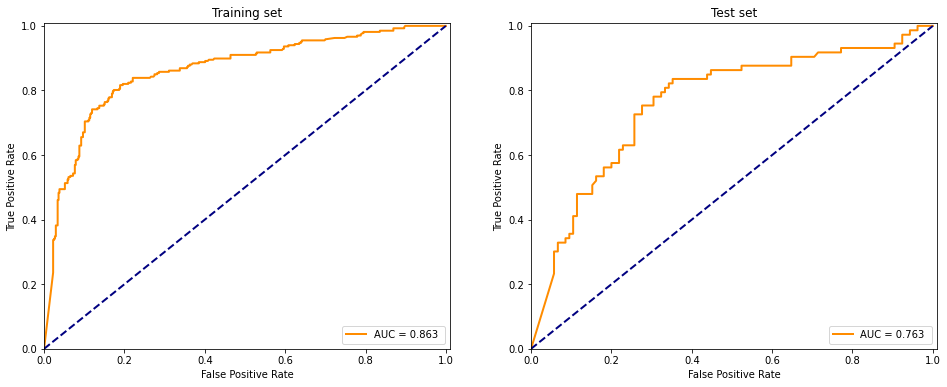

In [13]:
evaluate(MLPClassifier(alpha=1e-05, hidden_layer_sizes=(9, 2), random_state=1,
              solver='lbfgs'), X, y)

In [14]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import normalize

hidden_units=100 #numero de neuronas
hidden_layer_sizes=10
activation='relu'
solver='adam'
alpha=0.0001
batch_size='auto'
learning_rate='constant'
learning_rate_init=0.001 #learning rate keras
power_t=0.5
max_iter=200
shuffle=True
random_state=None
tol=0.0001
verbose=False
warm_start=False
momentum=0.9
nesterovs_momentum=True
early_stopping=False
validation_fraction=0.1
beta_1=0.9
beta_2=0.999
epsilon=1e-08
n_iter_no_change=10

In [15]:
X_train, X_test, y_train, y_test = train_test_split(normalize(X.values), y.values, test_size=.2,
                                                        random_state=0, shuffle=True)

In [16]:
model = Sequential() # Usamos  Keras y su modelo secuencial.
model.add(Dense(137, activation='relu', input_dim=X_train.shape[1]))
for i in range(hidden_layer_sizes): #for para numero de capas ocultas.
    model.add(Dense((420 + i*2) // 2, activation='relu')) #Utilizamos la función de activación RelU en las capas añadidas.
    if (i % 4 == 0): model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) #Añadimos una capa de activación sigmoid como ultima capa.
sgd = SGD(learning_rate=0.001, decay=0.9, momentum=0.9, nesterov=True) # optimizador
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 137)               1096      
                                                                 
 dense_1 (Dense)             (None, 210)               28980     
                                                                 
 dropout (Dropout)           (None, 210)               0         
                                                                 
 dense_2 (Dense)             (None, 211)               44521     
                                                                 
 dense_3 (Dense)             (None, 212)               44944     
                                                                 
 dense_4 (Dense)             (None, 213)               45369     
                                                                 
 dense_5 (Dense)             (None, 214)               4

In [17]:
from keras.utils import to_categorical
clf = model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=200,
              validation_data=(X_test, to_categorical(y_test)))

Epoch 1/10
4/4 [==============================] - 1s 73ms/step - loss: 0.6873 - accuracy: 0.6048 - val_loss: 0.6772 - val_accuracy: 0.5899
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6640 - accuracy: 0.6245 - val_loss: 0.6659 - val_accuracy: 0.5899
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6419 - accuracy: 0.6245 - val_loss: 0.6552 - val_accuracy: 0.5899
Epoch 4/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6259 - accuracy: 0.6245 - val_loss: 0.6504 - val_accuracy: 0.5899
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6233 - accuracy: 0.6245 - val_loss: 0.6407 - val_accuracy: 0.5899
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.6107 - accuracy: 0.6245 - val_loss: 0.6486 - val_accuracy: 0.5899
Epoch 7/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6078 - accuracy: 0.6245 - val_loss: 0.6396 - val_accuracy: 0.5899
Epoch 8/10
4/4 [===========

6/6 [==============================] - 0s 3ms/step


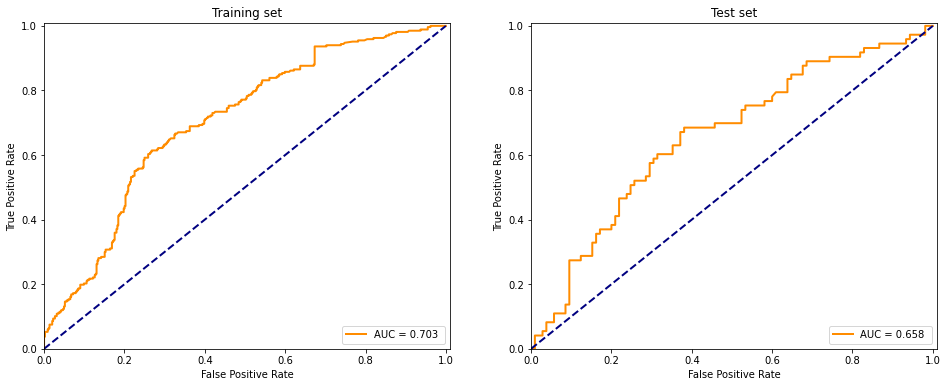

In [18]:
evaluate(model, X.values, y.values, fitted=True)